In [ ]:
import pandas as pd
import glob
import numpy as np
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
scores_retrotesting = pd.read_hdf("scores_retrotesting.hd5")

In [ ]:
scores_retrotesting=scores_retrotesting[scores_retrotesting['10_True_0.05'] == 1.0]

In [ ]:
scores_retrotesting

,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
45,1692,0bbb3403279779b81fe6bc1fe556ff69,1.0,CTSO,0.676775,0.663018,0.117365,0.092352
117,3955,1b754b1268deb3b6b6ed6a83ee7104ac,1.0,HALL,2.327082,0.911095,0.188943,0.164786
134,4460,1ef7ccd09c652ee1bcc653eb9a9d857c,1.0,CAPR,-0.279799,0.430503,0.085970,0.064822
191,6143,2b3788b24dc64e622ec4b47b19de2521,1.0,SLGG,-0.450264,0.389298,0.081423,0.060797
236,7259,33b7d9486f20c0a6c296c8860c6bf00f,1.0,ABNB,0.317014,0.578596,0.105342,0.080942
...,...,...,...,...,...,...,...,...
35775,34503,f27639fb94b4d032620d815e47d610d2,1.0,LW,-0.014444,0.496389,0.079369,0.071584
36039,12703,595e96d8289fd6df85dd64716680872f,1.0,BCYC,-2.939528,0.050234,0.037688,0.023286
36176,21378,95a136d40f47c8db3c0a851991f38fc7,1.0,REDU,-0.658707,0.341030,0.078057,0.056193
36287,30296,d573a87ede50634009cbb32ba331dca9,1.0,AGRX,-0.501690,0.377144,0.080094,0.059629


In [ ]:
ticker_price = pd.read_hdf("ticker_price_moment_exit.hd5")

In [ ]:
DF = scores_retrotesting.merge(ticker_price, how ='left', on = ['news_id', 'ticker'])

In [ ]:
DF1=DF[['news_id', 'ticker','timestamp', 'current_price']]

In [ ]:
all_files = glob.glob("intraday_data/*.hd5")

In [ ]:
all_files

['intraday_data\\2021-08-12.hd5',
 'intraday_data\\2021-08-13.hd5',
 'intraday_data\\2021-08-16.hd5',
 'intraday_data\\2021-08-17.hd5',
 'intraday_data\\2021-08-18.hd5',
 'intraday_data\\2021-08-19.hd5',
 'intraday_data\\2021-08-20.hd5',
 'intraday_data\\2021-08-23.hd5',
 'intraday_data\\2021-08-24.hd5',
 'intraday_data\\2021-08-25.hd5',
 'intraday_data\\2021-08-26.hd5',
 'intraday_data\\2021-08-27.hd5',
 'intraday_data\\2021-08-30.hd5',
 'intraday_data\\2021-08-31.hd5',
 'intraday_data\\2021-09-01.hd5',
 'intraday_data\\2021-09-02.hd5',
 'intraday_data\\2021-09-03.hd5',
 'intraday_data\\2021-09-07.hd5',
 'intraday_data\\2021-09-08.hd5',
 'intraday_data\\2021-09-09.hd5',
 'intraday_data\\2021-09-10.hd5',
 'intraday_data\\2021-09-13.hd5',
 'intraday_data\\2021-09-14.hd5',
 'intraday_data\\2021-09-15.hd5',
 'intraday_data\\2021-09-16.hd5',
 'intraday_data\\2021-09-17.hd5',
 'intraday_data\\2021-09-20.hd5',
 'intraday_data\\2021-09-21.hd5',
 'intraday_data\\2021-09-22.hd5',
 'intraday_dat

In [ ]:
liis = []
for filename in all_files:
    df = pd.read_hdf(filename, index_col=None, header=0)
    liis.append(df)
intraday = pd.concat(liis, axis=0, ignore_index=True)

In [ ]:
intraday

,open,high,close,low,volume,time,formated time,ticker,autofilled
0,35.2400,35.2400,35.2400,35.2400,4578.0,1628775000,2021-08-12 13:30:00+00:00,WMG,False
1,35.2400,NaN,35.2400,NaN,NaN,1628775060,2021-08-12 13:31:00+00:00,WMG,True
2,35.3200,35.3200,35.3200,35.3200,150.0,1628775120,2021-08-12 13:32:00+00:00,WMG,False
3,35.3200,NaN,35.3200,NaN,NaN,1628775180,2021-08-12 13:33:00+00:00,WMG,True
4,35.2639,35.2639,35.2100,35.1800,3029.0,1628775240,2021-08-12 13:34:00+00:00,WMG,False
...,...,...,...,...,...,...,...,...,...
19497005,15.7950,NaN,15.7950,NaN,NaN,1633732920,2021-10-08 22:42:00+00:00,DENN,True
19497006,15.7950,NaN,15.7950,NaN,NaN,1633732980,2021-10-08 22:43:00+00:00,DENN,True
19497007,15.7950,NaN,15.7950,NaN,NaN,1633733040,2021-10-08 22:44:00+00:00,DENN,True
19497008,15.7950,NaN,15.7950,NaN,NaN,1633733100,2021-10-08 22:45:00+00:00,DENN,True


In [ ]:
DAY=intraday[['close', 'time','formated time', 'ticker']]

In [ ]:
DF1.dropna()

,news_id,ticker,timestamp,current_price
132,11990bf67a5e0941138d285aa0acb5a5,CIO,1629492186,12.9
133,34684b70aee5b3119f8c7ebfa0ff313c,CIO,1629493444,12.9
141,30e66950e1fea601f665a447740a5e88,AXSM,1629713652,21.56
142,377b16b79fd3f3974a0f84bac2efdc2e,EM,1629714607,2.84
143,3824a5cd949c2463c53c54780577f8f3,RNAZ,1629748869,2.815
...,...,...,...,...
532,f27639fb94b4d032620d815e47d610d2,LW,1633609807,62.34
533,595e96d8289fd6df85dd64716680872f,BCYC,1633699867,48.74
534,95a136d40f47c8db3c0a851991f38fc7,REDU,1633695307,0.6875
535,d573a87ede50634009cbb32ba331dca9,AGRX,1633696203,0.9423


In [ ]:
DAY

,close,time,formated time,ticker
0,35.2400,1628775000,2021-08-12 13:30:00+00:00,WMG
1,35.2400,1628775060,2021-08-12 13:31:00+00:00,WMG
2,35.3200,1628775120,2021-08-12 13:32:00+00:00,WMG
3,35.3200,1628775180,2021-08-12 13:33:00+00:00,WMG
4,35.2100,1628775240,2021-08-12 13:34:00+00:00,WMG
...,...,...,...,...
19497005,15.7950,1633732920,2021-10-08 22:42:00+00:00,DENN
19497006,15.7950,1633732980,2021-10-08 22:43:00+00:00,DENN
19497007,15.7950,1633733040,2021-10-08 22:44:00+00:00,DENN
19497008,15.7950,1633733100,2021-10-08 22:45:00+00:00,DENN


In [ ]:
def best_profit(tickerq, money = 100,data1 = DAY, data2 = DF1): 
    profit = -1000 
    count = 1
    time_in = 0
    time_out = 0 
    newsdate = data2[data2['ticker'] == tickerq]['timestamp'].values[0] 
    for time1 in range(2): 
        date_in = newsdate - newsdate%60 + time1*60 
        price1 = data1[(data1['time'] == date_in) & (data1['ticker'] == tickerq)]['close'].values[0]
        count=money/price1
        for time2 in range(21):
            date_out = date_in + time2*60
            price2 = data1[(data1['time'] == date_out) & (data1['ticker'] == tickerq)]['close'].values[0]
            profit1 = abs(price2 - price1)#модуль так как не знаем шорт/лонг
            if profit1 > profit:
                        profit, time_in, time_out = profit1, time1, time2
            
    
    return(profit*count, time_in, time_out)

In [ ]:
def profit(data,newstime,time__in,time__out,price,money=100):
    time_in = newstime - newstime%60 + time__in*60
    price_in = data[data["time"] == time_in]
    if price_in > price:
        return 0
    time_out = time_in + time__out*60
    price_out = data[data["time"] == time_out]
    count= money/price_in['close'].values[0]

    return abs(price_out['close'].values[0] - price_in['close'].values[0])*count

In [ ]:
DF1=DF1.dropna()
DF1=DF1.drop_duplicates(subset=['ticker'])

In [ ]:
DF1=DF1[0:50]

In [ ]:
DF1

,news_id,ticker,timestamp,current_price
132,11990bf67a5e0941138d285aa0acb5a5,CIO,1629492186,12.9
141,30e66950e1fea601f665a447740a5e88,AXSM,1629713652,21.56
142,377b16b79fd3f3974a0f84bac2efdc2e,EM,1629714607,2.84
143,3824a5cd949c2463c53c54780577f8f3,RNAZ,1629748869,2.815
144,51061408233269cbecfdcceeb5a416ed,VVOS,1629720224,3.84
145,7b3c4c0e97e33104b86f2579f8efce92,TXMD,1629715806,0.7636
147,9b7854b4dd228f99851dda73b9be86c9,QIPT,1629754550,6.03
148,a4d38b39edc4ce9ac872f2828581a3c5,VLDR,1629725402,6.17
149,b096afa3215dbc73dd34b109f00168f1,BKYI,1629719886,2.94
150,bc5d16e63c2c59a8856192e654983d8d,HGBL,1629749705,1.74


In [ ]:
best_profit = []
time_in = []
time_out = []
for tic in DF1['ticker']:
    a,b,c=best_profit(tic)
    best_profit.append(a)
    time_in.append(b)
    time_out.append(c)

In [ ]:
DF1['best_profit'] = best_profit
DF1['open_pos_time'] = time_in
DF1['close_pos_time'] = time_out

In [ ]:
DFP=DF1

In [ ]:
DFP

,news_id,ticker,timestamp,current_price,best_profit,open_pos_time,close_pos_time
158,223dfb3ef71cd3eb2920888185fe3f68,HUIZ,1629842406,2.68,8.451758,1,10
195,1b13c0f1d51a00e8b580f727d86ef9fd,HTBX,1629979210,6.73,30.323680,0,16
145,7b3c4c0e97e33104b86f2579f8efce92,TXMD,1629715806,0.7636,10.714286,0,3
179,68d69f63cf89edb0aad373c3358775fa,ESTC,1629921916,158.06,18.456995,0,13
174,200606b3008ae58748cf0856db4c9a14,SNOW,1629925995,283.76,21.617418,1,6
193,f5e48e9d7a4d2e77caa5799d13a39456,EXPR,1629888305,7.26,6.211937,1,13
166,a897f6e2006da09c0afe8f73cdfdaf1c,ECOR,1629806406,0.9515,20.833333,0,4
197,22d155334bc8fdef4a37d0f5819644f4,KOPN,1629984670,5.76,8.201550,0,16
172,1771e7d21e66d242b2c7ab646cbfe7a3,WSM,1629922563,170.74,11.006289,0,3
153,dcf02e67952c4f9cea768bf7a9f76a3d,ALF,1629727220,8.83,35.602094,0,6


In [ ]:
DF1.to_csv('out.csv', encoding='utf-8', index=False)

<BarContainer object of 50 artists>

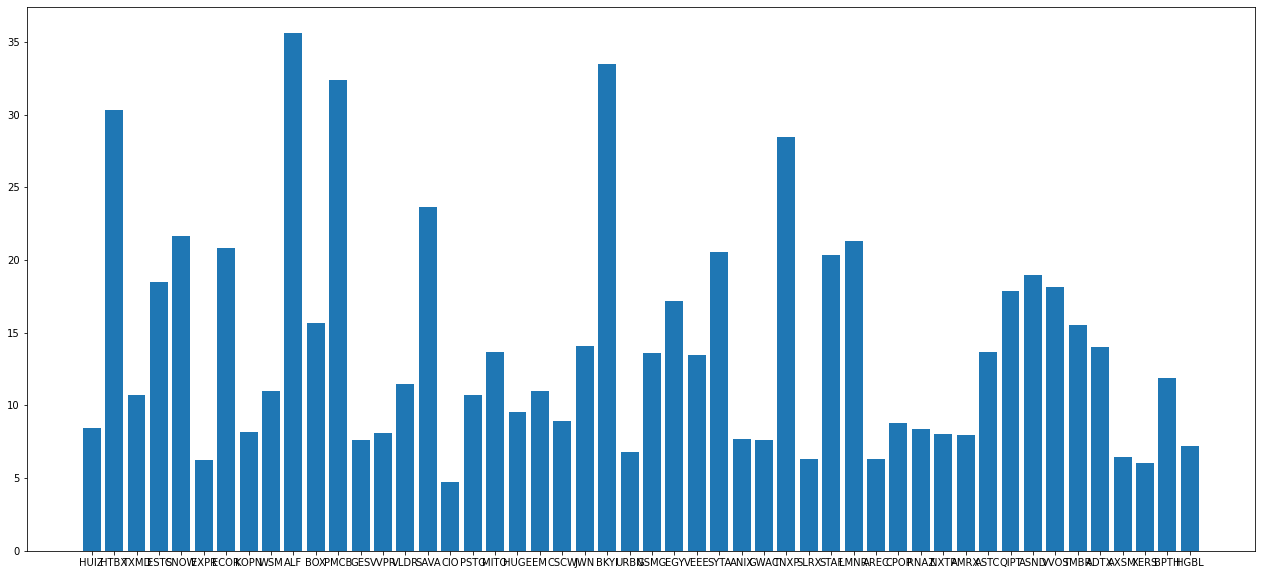

In [ ]:
plt.subplots(figsize=(22, 10))
plt.bar(DF1['ticker'],DF1['best_profit'])

In [ ]:
CM=DAY[(DAY["ticker"]=="VLDR")]
CM[CM["time"]>1629725400].head(60)#Заходим через минуту выходим через 30

,close,time,formated time,ticker
3966518,6.4500,1629725460,2021-08-23 13:31:00+00:00,VLDR
3966519,6.4800,1629725520,2021-08-23 13:32:00+00:00,VLDR
3966520,6.5324,1629725580,2021-08-23 13:33:00+00:00,VLDR
3966521,6.6200,1629725640,2021-08-23 13:34:00+00:00,VLDR
3966522,6.6000,1629725700,2021-08-23 13:35:00+00:00,VLDR
3966523,6.6700,1629725760,2021-08-23 13:36:00+00:00,VLDR
3966524,6.7100,1629725820,2021-08-23 13:37:00+00:00,VLDR
3966525,6.7300,1629725880,2021-08-23 13:38:00+00:00,VLDR
3966526,6.7100,1629725940,2021-08-23 13:39:00+00:00,VLDR
3966527,6.7150,1629726000,2021-08-23 13:40:00+00:00,VLDR


In [ ]:
CM=DAY[(DAY["ticker"]=="RIBT")]
CM[CM["time"]>1631192488].head(60)#Заходим через минуту выходим через 30

,close,time,formated time,ticker
9860752,0.679300,1631192520,2021-09-09 13:02:00+00:00,RIBT
9860753,0.676800,1631192580,2021-09-09 13:03:00+00:00,RIBT
9860754,0.676800,1631192640,2021-09-09 13:04:00+00:00,RIBT
9860755,0.695900,1631192700,2021-09-09 13:05:00+00:00,RIBT
9860756,0.695900,1631192760,2021-09-09 13:06:00+00:00,RIBT
9860757,0.695900,1631192820,2021-09-09 13:07:00+00:00,RIBT
9860758,0.695900,1631192880,2021-09-09 13:08:00+00:00,RIBT
9860759,0.695900,1631192940,2021-09-09 13:09:00+00:00,RIBT
9860760,0.695900,1631193000,2021-09-09 13:10:00+00:00,RIBT
9860761,0.695900,1631193060,2021-09-09 13:11:00+00:00,RIBT


In [ ]:
CM=DAY[(DAY["ticker"]=="FARM")]
CM[CM["time"]>1631217600].head(30)#Заходим через минуту выходим через 7

,close,time,formated time,ticker
10345311,7.84,1631217660,2021-09-09 20:01:00+00:00,FARM
10345312,7.61,1631217720,2021-09-09 20:02:00+00:00,FARM
10345313,8.20,1631217780,2021-09-09 20:03:00+00:00,FARM
10345314,8.20,1631217840,2021-09-09 20:04:00+00:00,FARM
10345315,8.20,1631217900,2021-09-09 20:05:00+00:00,FARM
10345316,8.40,1631217960,2021-09-09 20:06:00+00:00,FARM
10345317,8.40,1631218020,2021-09-09 20:07:00+00:00,FARM
10345318,8.60,1631218080,2021-09-09 20:08:00+00:00,FARM
10345319,8.60,1631218140,2021-09-09 20:09:00+00:00,FARM
10345320,8.60,1631218200,2021-09-09 20:10:00+00:00,FARM


In [ ]:
CM=DAY[(DAY["ticker"]=="CEMI")]
CM[CM["time"]>1630065600].head(30)#Заходим сразу продём через 16

,close,time,formated time,ticker
5920733,2.8100,1630065660,2021-08-27 12:01:00+00:00,CEMI
5920734,2.8600,1630065720,2021-08-27 12:02:00+00:00,CEMI
5920735,2.9100,1630065780,2021-08-27 12:03:00+00:00,CEMI
5920736,2.9000,1630065840,2021-08-27 12:04:00+00:00,CEMI
5920737,2.9400,1630065900,2021-08-27 12:05:00+00:00,CEMI
5920738,2.9700,1630065960,2021-08-27 12:06:00+00:00,CEMI
5920739,3.1300,1630066020,2021-08-27 12:07:00+00:00,CEMI
5920740,3.1800,1630066080,2021-08-27 12:08:00+00:00,CEMI
5920741,3.1400,1630066140,2021-08-27 12:09:00+00:00,CEMI
5920742,3.0800,1630066200,2021-08-27 12:10:00+00:00,CEMI


In [ ]:
CM=DAY[(DAY["ticker"]=="METX")]
CM[CM["time"]>=1630528800].head(30)#Заходим сразу продаём через 18

,close,time,formated time,ticker
7239089,0.7700,1630528800,2021-09-01 20:40:00+00:00,METX
7239090,0.6900,1630528860,2021-09-01 20:41:00+00:00,METX
7239091,0.7098,1630528920,2021-09-01 20:42:00+00:00,METX
7239092,0.7175,1630528980,2021-09-01 20:43:00+00:00,METX
7239093,0.7244,1630529040,2021-09-01 20:44:00+00:00,METX
7239094,0.7376,1630529100,2021-09-01 20:45:00+00:00,METX
7239095,0.6980,1630529160,2021-09-01 20:46:00+00:00,METX
7239096,0.6734,1630529220,2021-09-01 20:47:00+00:00,METX
7239097,0.6532,1630529280,2021-09-01 20:48:00+00:00,METX
7239098,0.6288,1630529340,2021-09-01 20:49:00+00:00,METX


In [ ]:
CM=DAY[(DAY["ticker"]=="PBTS")]
CM[CM["time"]>=1630497600].head(30)#Заходим через 2 минуты продаём через 7,8 Снова заходим продаём через 16

,close,time,formated time,ticker
7677006,1.5384,1630497600,2021-09-01 12:00:00+00:00,PBTS
7677007,1.5400,1630497660,2021-09-01 12:01:00+00:00,PBTS
7677008,1.5300,1630497720,2021-09-01 12:02:00+00:00,PBTS
7677009,1.4900,1630497780,2021-09-01 12:03:00+00:00,PBTS
7677010,1.5200,1630497840,2021-09-01 12:04:00+00:00,PBTS
7677011,1.5000,1630497900,2021-09-01 12:05:00+00:00,PBTS
7677012,1.5000,1630497960,2021-09-01 12:06:00+00:00,PBTS
7677013,1.5000,1630498020,2021-09-01 12:07:00+00:00,PBTS
7677014,1.5200,1630498080,2021-09-01 12:08:00+00:00,PBTS
7677015,1.5000,1630498140,2021-09-01 12:09:00+00:00,PBTS


In [ ]:
CM=DAY[(DAY["ticker"]=="GANX")]
CM[CM["time"]>=1631100500].head(30)#Заходим сразу продаём через 4 Сразу заходим выходим через 21

,close,time,formated time,ticker
9089746,10.64,1631100540,2021-09-08 11:29:00+00:00,GANX
9089747,11.97,1631100600,2021-09-08 11:30:00+00:00,GANX
9089748,10.80,1631100660,2021-09-08 11:31:00+00:00,GANX
9089749,11.20,1631100720,2021-09-08 11:32:00+00:00,GANX
9089750,12.25,1631100780,2021-09-08 11:33:00+00:00,GANX
9089751,11.37,1631100840,2021-09-08 11:34:00+00:00,GANX
9089752,10.99,1631100900,2021-09-08 11:35:00+00:00,GANX
9089753,11.05,1631100960,2021-09-08 11:36:00+00:00,GANX
9089754,11.48,1631101020,2021-09-08 11:37:00+00:00,GANX
9089755,11.19,1631101080,2021-09-08 11:38:00+00:00,GANX


In [ ]:
CM=DAY[(DAY["ticker"]=="BASE")]
CM[CM["time"]>=1631131500].head(30)#Заходим сразу выходим через 16 Сразу закупаемся

,close,time,formated time,ticker
9214840,52.00,1631131500,2021-09-08 20:05:00+00:00,BASE
9214841,52.00,1631131560,2021-09-08 20:06:00+00:00,BASE
9214842,52.00,1631131620,2021-09-08 20:07:00+00:00,BASE
9214843,52.00,1631131680,2021-09-08 20:08:00+00:00,BASE
9214844,52.00,1631131740,2021-09-08 20:09:00+00:00,BASE
9214845,52.00,1631131800,2021-09-08 20:10:00+00:00,BASE
9214846,49.00,1631131860,2021-09-08 20:11:00+00:00,BASE
9214847,45.99,1631131920,2021-09-08 20:12:00+00:00,BASE
9214848,44.21,1631131980,2021-09-08 20:13:00+00:00,BASE
9214849,44.25,1631132040,2021-09-08 20:14:00+00:00,BASE


In [ ]:
CM=DAY[(DAY["ticker"]=="AGMH")]
CM[CM["time"]>=1632915900].head(30)#Заходим через минуту выходим через 16

,close,time,formated time,ticker
15805714,9.49,1632915900,2021-09-29 11:45:00+00:00,AGMH
15805715,9.71,1632915960,2021-09-29 11:46:00+00:00,AGMH
15805716,9.45,1632916020,2021-09-29 11:47:00+00:00,AGMH
15805717,9.16,1632916080,2021-09-29 11:48:00+00:00,AGMH
15805718,9.20,1632916140,2021-09-29 11:49:00+00:00,AGMH
15805719,9.32,1632916200,2021-09-29 11:50:00+00:00,AGMH
15805720,9.12,1632916260,2021-09-29 11:51:00+00:00,AGMH
15805721,9.12,1632916320,2021-09-29 11:52:00+00:00,AGMH
15805722,9.12,1632916380,2021-09-29 11:53:00+00:00,AGMH
15805723,9.01,1632916440,2021-09-29 11:54:00+00:00,AGMH


In [ ]:
CM=DAY[(DAY["ticker"]=="TC")]
CM[CM["time"]>=1632947410].head(30)#Сразу заходим выходим через пару минут, заходим выхоидм через 10

,close,time,formated time,ticker
15975466,2.45,1632947460,2021-09-29 20:31:00+00:00,TC
15975467,2.45,1632947520,2021-09-29 20:32:00+00:00,TC
15975468,2.97,1632947580,2021-09-29 20:33:00+00:00,TC
15975469,2.97,1632947640,2021-09-29 20:34:00+00:00,TC
15975470,2.97,1632947700,2021-09-29 20:35:00+00:00,TC
15975471,2.97,1632947760,2021-09-29 20:36:00+00:00,TC
15975472,2.97,1632947820,2021-09-29 20:37:00+00:00,TC
15975473,2.97,1632947880,2021-09-29 20:38:00+00:00,TC
15975474,2.97,1632947940,2021-09-29 20:39:00+00:00,TC
15975475,2.97,1632948000,2021-09-29 20:40:00+00:00,TC


In [ ]:
CM=DAY[(DAY["ticker"]=="BLU")]
CM[CM["time"]>=1631533500].head(60)#Сразу заходим , выходим через минуту, можно опять взять и продать через ~40 минут

,close,time,formated time,ticker
10842886,4.1400,1631533500,2021-09-13 11:45:00+00:00,BLU
10842887,5.3000,1631533560,2021-09-13 11:46:00+00:00,BLU
10842888,5.1400,1631533620,2021-09-13 11:47:00+00:00,BLU
10842889,4.9100,1631533680,2021-09-13 11:48:00+00:00,BLU
10842890,4.7500,1631533740,2021-09-13 11:49:00+00:00,BLU
10842891,4.8400,1631533800,2021-09-13 11:50:00+00:00,BLU
10842892,4.5000,1631533860,2021-09-13 11:51:00+00:00,BLU
10842893,4.7000,1631533920,2021-09-13 11:52:00+00:00,BLU
10842894,4.7500,1631533980,2021-09-13 11:53:00+00:00,BLU
10842895,4.8800,1631534040,2021-09-13 11:54:00+00:00,BLU


Шортить ~16 минут рост через минуту заходим ~7 минут